In [1]:
import yfinance as yf
from pandas import *
import numpy as np
import pandas_ta as ta
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import math 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, log_loss
)

In [2]:
# inda = yf.download("INDA", start="2010-01-01", end="2025-3-31")
# inda.columns = [col[0] if isinstance(col, tuple) else col for col in inda.columns]
# inda = read_csv(r"INDA_Historical_Data.csv")
# inda['Date'] = to_datetime(inda['Date'], format='%d-%m-%Y')
# inda = inda.rename(columns={'Price':'Close', 'Vol.':'Volume'})
# inda= inda.set_index('Date').sort_index()
# def convert_volume(val):
#     if isinstance(val, str):
#         val = val.strip()
#         if val.endswith('M'):
#             return float(val[:-1]) * 1_000_000
#         elif val.endswith('K'):
#             return float(val[:-1]) * 1_000
#     return float(val)

# inda['Volume'] = inda['Volume'].apply(convert_volume)
# inda = inda.drop('Change %',axis=1)
# inda.columns = inda.columns.str.strip().str.lstrip('#').str.strip().str.lower()
# inda.ta.strategy("All",append=True)

In [3]:
df= read_csv(r"E:\Portfolio\Portfolio\INDA-CRISP\INDA_TI_ALL.csv")
df['Date']= to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df

,close,open,high,low,volume,ABER_ZG_5_15,ABER_SG_5_15,ABER_XG_5_15,ABER_ATR_5_15,ACCBL_20,...,VIDYA_14,VTXP_14,VTXM_14,VWAP_D,VWMA_10,WCP,WILLR_14,WMA_10,ZL_EMA_10,ZS_30
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,26.51,27.64,27.64,26.43,4050.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.860000,NaN,26.7725,NaN,NaN,NaN,NaN
2012-02-07,26.27,26.26,26.27,26.26,2300.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.266667,NaN,26.2675,NaN,NaN,NaN,NaN
2012-02-08,26.56,27.63,27.63,26.40,3650.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.863333,NaN,26.7875,NaN,NaN,NaN,NaN
2012-02-09,26.49,26.63,26.63,26.49,2550.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.536667,NaN,26.5250,NaN,NaN,NaN,NaN
2012-02-10,26.01,26.30,26.30,25.89,6200.0,26.518667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,26.066667,NaN,26.0525,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-29,53.54,53.40,53.56,53.27,4080000.0,53.284000,54.083558,52.484442,0.799558,49.858730,...,51.525202,1.108629,0.644068,53.456667,52.499719,53.4775,-4.406130,53.140727,53.493361,1.588206
2025-04-30,53.57,53.46,53.78,53.28,7090000.0,53.334000,54.113587,52.554413,0.779587,49.963363,...,51.629043,1.163551,0.655140,53.543333,52.953722,53.5500,-5.172414,53.287636,53.476387,1.497545
2025-05-01,53.54,53.65,53.72,53.49,5260000.0,53.339333,54.082282,52.596385,0.742948,50.083793,...,51.768948,1.146341,0.603393,53.583333,53.182452,53.5725,-6.400000,53.384727,53.613407,1.366772


In [4]:
df = df.loc[:, df.isna().mean() <= 0.2]
first_valid_index = df.dropna().index[0]
df = df.loc[first_valid_index:]
df= df.truncate(before=datetime(2015,1,1))
nan_columns= df.columns[df.isna().any()]
df_nan_only= df[nan_columns]
df_nan_only.tail(10)

,volume,AD,OBV,OBV_min_2,OBV_max_2,CMF_20,DPO_20,EOM_14_100000000,ICS_26,MFI_14,PVOL,PVT,VWAP_D,VWMA_10
Date,,,,,,,,,,,,,,
2025-04-22,10240000.0,6.321368e+08,349488980.0,339248980.0,349488980.0,0.026331,NaN,1.367114,NaN,68.354310,547840000.0,-2.404893e+08,53.506667,51.356859
2025-04-23,7360000.0,6.266968e+08,342128980.0,342128980.0,349488980.0,-0.045529,NaN,1.091728,NaN,64.009535,391404800.0,-2.448915e+08,53.293333,51.643358
2025-04-24,4290000.0,6.305648e+08,346418980.0,342128980.0,346418980.0,0.017547,NaN,1.272104,NaN,69.961360,230544600.0,-2.403740e+08,53.556667,51.854973
2025-04-25,6680000.0,6.367310e+08,339738980.0,339738980.0,346418980.0,0.047062,NaN,1.753569,NaN,73.048311,353038000.0,-2.514369e+08,52.770000,52.081657
2025-04-28,7110000.0,6.344558e+08,346848980.0,339738980.0,346848980.0,0.064229,NaN,2.162750,NaN,82.722345,378891900.0,-2.455175e+08,53.343333,52.353656
2025-04-29,4080000.0,6.379730e+08,350928980.0,346848980.0,350928980.0,0.063904,NaN,1.960520,NaN,82.185773,218443200.0,-2.436035e+08,53.456667,52.499719
2025-04-30,7090000.0,6.391074e+08,358018980.0,350928980.0,358018980.0,0.060874,NaN,1.699677,NaN,79.572700,379811300.0,-2.432062e+08,53.543333,52.953722
2025-05-01,5260000.0,6.361344e+08,352758980.0,352758980.0,358018980.0,0.034964,NaN,1.574801,NaN,87.473718,281620400.0,-2.435008e+08,53.583333,53.182452
2025-05-02,4990000.0,6.347734e+08,357748980.0,352758980.0,357748980.0,0.031044,NaN,1.629922,NaN,86.818131,269010900.0,-2.400523e+08,53.940000,53.364668


In [5]:
##Dropping column which does not have recent value, which required significant forward prices sereies to calculate
df = df.drop(['DPO_20','ICS_26'],axis=1)

In [6]:
df= df.bfill()

In [7]:
df_ML= df.drop(['close','high','low','volume'],axis=1
               )

In [8]:
df_ML['target'] = (df_ML['open'].shift(-1) > df_ML['open']).astype(int)
#df['target'] = (df['open'].shift(-1) > df['open']).astype(int)


# df_ML.drop('open',axis=1,inplace=True)


In [9]:
df_ML['target'].sum()/df_ML.shape[0]

0.5316070068545317

In [10]:
df_ML.to_clipboard()

In [11]:
def sequential_feature_selection(X: DataFrame, y: Series, var_thresh=0.01, chi2_k='all', lasso_C=0.1):
    # Step 1: Low Variance Filter
    var_selector = VarianceThreshold(threshold=var_thresh)
    X_var = var_selector.fit_transform(X)
    var_cols = X.columns[var_selector.get_support()]
    X = DataFrame(X_var, columns=var_cols)

    # Step 2: Chi-Squared (requires non-negative values)
    X_nonneg = X - X.min()
    chi2_selector = SelectKBest(score_func=chi2, k=chi2_k)
    X_chi2 = chi2_selector.fit_transform(X_nonneg, y)
    chi2_cols = X.columns[chi2_selector.get_support()]
    X = DataFrame(X_chi2, columns=chi2_cols)

    # Step 3: LASSO (Logistic Regression with L1 penalty)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    lasso = LogisticRegression(penalty='l1', solver='liblinear', C=lasso_C, random_state=42)
    lasso.fit(X_scaled, y)
    lasso_mask = lasso.coef_[0] != 0
    lasso_features = X.columns[lasso_mask]

    return list(lasso_features)

In [12]:
# Seperation of In sample and out of sample train-test data
# 70% of top --> In sample 30%--> out of sample (Test)
n_train = math.floor(0.7*df_ML.shape[0])
df_train =df_ML.iloc[:n_train]
df_test= df_ML.iloc[n_train:]
X_train = df_train.drop('target',axis=1)
X_test = df_test.drop('target',axis=1)
Y_train = df_train['target']
Y_test = df_test['target']

In [13]:
# we will do feature selection as well as traning on the basis of X trainig data set
FS = sequential_feature_selection(X_train,Y_train)
print(FS)

['ABER_ATR_5_15', 'AMATe_LR_8_21_2', 'AMATe_SR_8_21_2', 'OBV', 'OBV_min_2', 'AOBV_LR_2', 'APO_12_26', 'AROOND_14', 'BOP', 'AR_26', 'CDL_DOJI_10_0.1', 'CDL_INSIDE', 'CHOP_14_1_100', 'CMF_20', 'BULLP_13', 'INC_1', 'KVOs_34_55_13', 'MASSI_9_25', 'PSARr_0.02_0.2', 'PSL_12', 'PVOh_12_26_9', 'PVOs_12_26_9', 'PVR', 'PVT', 'SQZ_ON', 'SQZ_OFF', 'SQZPRO_ON_WIDE', 'SQZPRO_ON_NORMAL', 'SQZPRO_OFF', 'STC_10_12_26_0.5', 'SUPERTd_7_3.0', 'THERMOl_20_2_0.5', 'VTXP_14', 'VTXM_14']


In [14]:
### Classification Model 1: Using selected features 
X_train_FS =X_train[FS]
X_test_FS =X_test[FS]

In [15]:
for col in X_train_FS.columns:
    if X_train_FS[col].nunique(dropna=False) == 2:
        X_train_FS.loc[:, col] = X_train_FS[col].astype('category')
        X_test_FS.loc[:, col] = X_test_FS[col].astype('category')  # same column assumed in test


In [16]:
def evaluate_classification(y_train, y_train_pred, y_train_prob,
                             y_test, y_test_pred, y_test_prob,
                             show_confusion_heatmap=True):
    results = {}

    # Accuracy
    results['Train Accuracy'] = accuracy_score(y_train, y_train_pred)
    results['Test Accuracy'] = accuracy_score(y_test, y_test_pred)

    # Precision
    results['Train Precision'] = precision_score(y_train, y_train_pred)
    results['Test Precision'] = precision_score(y_test, y_test_pred)

    # Recall
    results['Train Recall'] = recall_score(y_train, y_train_pred)
    results['Test Recall'] = recall_score(y_test, y_test_pred)

    # F1 Score
    results['Train F1'] = f1_score(y_train, y_train_pred)
    results['Test F1'] = f1_score(y_test, y_test_pred)

    # AUC-ROC
    results['Train AUC-ROC'] = roc_auc_score(y_train, y_train_prob)
    results['Test AUC-ROC'] = roc_auc_score(y_test, y_test_prob)

    # McFadden's R²
    ll_null = log_loss(y_test, [y_test.mean()] * len(y_test), normalize=False)
    ll_model = log_loss(y_test, y_test_prob, normalize=False)
    results['McFadden R²'] = 1 - (ll_model / ll_null)

    # Confusion Matrix Heatmap
    if show_confusion_heatmap:
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred 0', 'Pred 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title('Test Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.tight_layout()
        plt.show()

    return Series(results)

In [17]:
# Pipeline: Scaling + Logistic Regression (with Elastic Net)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # standardize inputs
    ('clf', LogisticRegression(penalty='elasticnet', solver='saga', max_iter=5000))
])

# Hyperparameter grid
param_grid = {
    'clf__C': [0.01, 0.1, 1, 10],                # Regularization strength (lower is stronger)
    'clf__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]  # Elastic Net mixing: 0 = Ridge, 1 = Lasso
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)
grid_search.fit(X_train_FS, Y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'clf__C': 0.01, 'clf__l1_ratio': 1.0}
Best Cross-Validation Score: 0.6610146902025826


In [18]:
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train_FS)
y_test_pred = best_model.predict(X_test_FS)
y_train_prob = best_model.predict_proba(X_train_FS)[:, 1]
y_test_prob = best_model.predict_proba(X_test_FS)[:, 1]



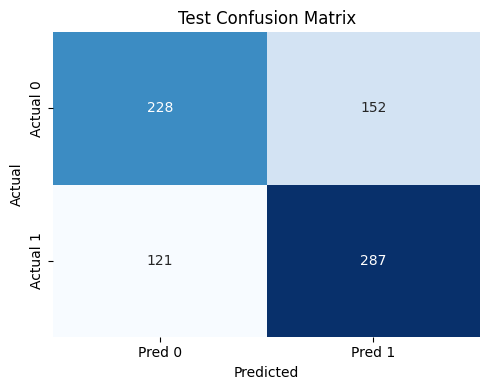

Train Accuracy     0.660501
Test Accuracy      0.653553
Train Precision    0.667279
Test Precision     0.653759
Train Recall       0.734818
Test Recall        0.703431
Train F1           0.699422
Test F1            0.677686
Train AUC-ROC      0.700314
Test AUC-ROC       0.701461
McFadden R²        0.079527
dtype: float64


In [19]:

# Evaluate
metrics = evaluate_classification(
    Y_train, y_train_pred, y_train_prob,
    Y_test, y_test_pred, y_test_prob,
    show_confusion_heatmap=True
)
print(metrics)

In [20]:
# Run Random Forest with hyperparameter tuning (no parallelism)
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid={
        'n_estimators': [50,100],
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    },
    cv=5,
    scoring='accuracy',
    n_jobs=1,
    verbose=1
)

# Fit the model and get the best estimator
grid_search_rf.fit(X_train_FS, Y_train)
best_rf_model = grid_search_rf.best_estimator_

# Output best parameters and CV score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best CV Accuracy:", grid_search_rf.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best CV Accuracy: 0.6419529676578604


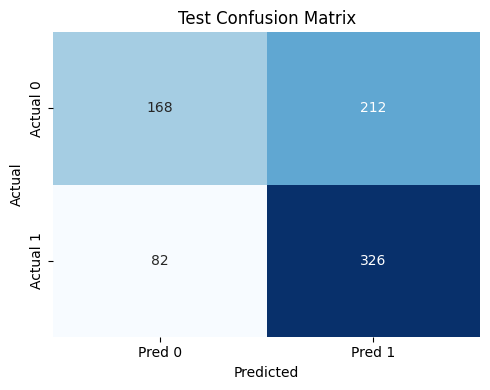

Train Accuracy     0.732318
Test Accuracy      0.626904
Train Precision    0.711244
Test Precision     0.605948
Train Recall       0.845142
Test Recall        0.799020
Train F1           0.772433
Test F1            0.689218
Train AUC-ROC      0.816307
Test AUC-ROC       0.676561
McFadden R²        0.064830
dtype: float64


In [21]:
y_train_pred = best_rf_model.predict(X_train_FS)
y_test_pred = best_rf_model.predict(X_test_FS)
y_train_prob = best_rf_model.predict_proba(X_train_FS)[:, 1]
y_test_prob = best_rf_model.predict_proba(X_test_FS)[:, 1]

metrics_rf = evaluate_classification(
    Y_train, y_train_pred, y_train_prob,
    Y_test, y_test_pred, y_test_prob,
    show_confusion_heatmap=True
)
print(metrics_rf)


In [22]:
xgb = XGBClassifier( eval_metric='logloss', random_state=42, enable_categorical=True)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Setup grid search
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='roc_auc',  # or 'roc_auc' for binary
                           cv=5,
                           verbose=1,
                           n_jobs=1)

# Fit on training data
grid_search.fit(X_train_FS, Y_train)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


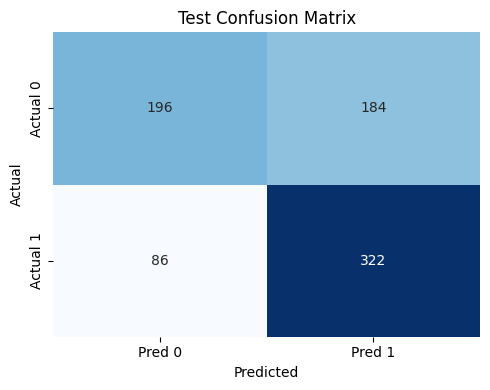

Train Accuracy     0.686616
Test Accuracy      0.657360
Train Precision    0.671096
Test Precision     0.636364
Train Recall       0.817814
Test Recall        0.789216
Train F1           0.737226
Test F1            0.704595
Train AUC-ROC      0.747630
Test AUC-ROC       0.702738
McFadden R²        0.073452
dtype: float64


In [23]:
y_train_pred = best_model.predict(X_train_FS)
y_test_pred = best_model.predict(X_test_FS)
y_train_prob = best_model.predict_proba(X_train_FS)[:, 1]
y_test_prob = best_model.predict_proba(X_test_FS)[:, 1]

metrics_rf = evaluate_classification(
    Y_train, y_train_pred, y_train_prob,
    Y_test, y_test_pred, y_test_prob,
    show_confusion_heatmap=True
)
print(metrics_rf)

| **Metric**            | **Interpretation**                                                                                                |
| --------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Precision (63.6%)** | Of all predicted *up* moves, \~64% actually went up. <br>**Higher precision = fewer false buys.**                 |
| **Recall (78.9%)**    | Of all actual *up* moves, \~79% were captured by the model. <br>**High recall = good at catching rising stocks.** |
| **F1 (70.5%)**        | Balanced metric — model has a healthy mix of precision and recall.                                                |
| **AUC-ROC (\~0.70)**  | Decent discriminative power — can separate gainers from non-gainers.                                              |


💰 Profit/Loss Insight (If Used in Trading)
If you go long when the model predicts “up”:
- True Positive (TP): You buy and it rises — ✅ profit.
- False Positive (FP): You buy and it falls — ❌ loss.

From Precision ~64%:
- 36% of your long trades are wrong, so you lose money ~1 in 3 trades.

Profitability depends on:
- Average gain on correct trades vs. loss on wrong ones Whether transaction costs/slippage are small

- From Recall ~79%:
 You catch most of the profitable trades.

So you’re in the game for big upswings, even if you miss some profits from not filtering better.

In [46]:
def simulate_long_short_returns(open_prices: Series, y_pred: Series) -> DataFrame:
    """
    Simulate long-short strategy based on open prices and binary predictions.
    Returns daily % return and cumulative return.
    
    open_prices: Series of open prices indexed by date
    y_pred: binary Series aligned to open_prices.index[:-1]
    """

    assert len(open_prices) == len(y_pred) + 1, "Length mismatch: open_prices must have one extra value."

    open_t = open_prices.iloc[:-1].values
    open_tp1 = open_prices.iloc[1:].values

    returns = []
    for pred, o_t, o_tp1 in zip(y_pred, open_t, open_tp1):
        if pred == 1:  # Long
            r = (o_tp1 / o_t) - 1
        else:          # Short
            r = (o_t / o_tp1) - 1
        returns.append(r)

    # Create return DataFrame
    ret_df = DataFrame({
        'Date': open_prices.index[1:],
        'Prediction': y_pred,
        'Open_t': open_t,
        'Open_t+1': open_tp1,
        'Return': returns
    }).set_index('Date')

    ret_df['Cumulative Return'] = ((1 + ret_df['Return']).cumprod()-1)*100
    return ret_df



In [48]:
open_prices= X_test['open']
y_test_pred = Series(best_model.predict(X_test_FS),index=X_test_FS.index)
y_test_pred= y_test_pred.iloc[1:]
ret_df = simulate_long_short_returns(open_prices, y_test_pred)
print(ret_df.tail())

            Prediction  Open_t  Open_t+1    Return  Cumulative Return
Date                                                                 
2025-04-29           1   53.59     53.40 -0.003545          29.857193
2025-04-30           1   53.40     53.46  0.001124          30.003100
2025-05-01           0   53.46     53.65 -0.003541          29.542697
2025-05-02           0   53.65     54.04 -0.007217          28.607804
2025-05-05           1   54.04     54.34  0.005551          29.321762


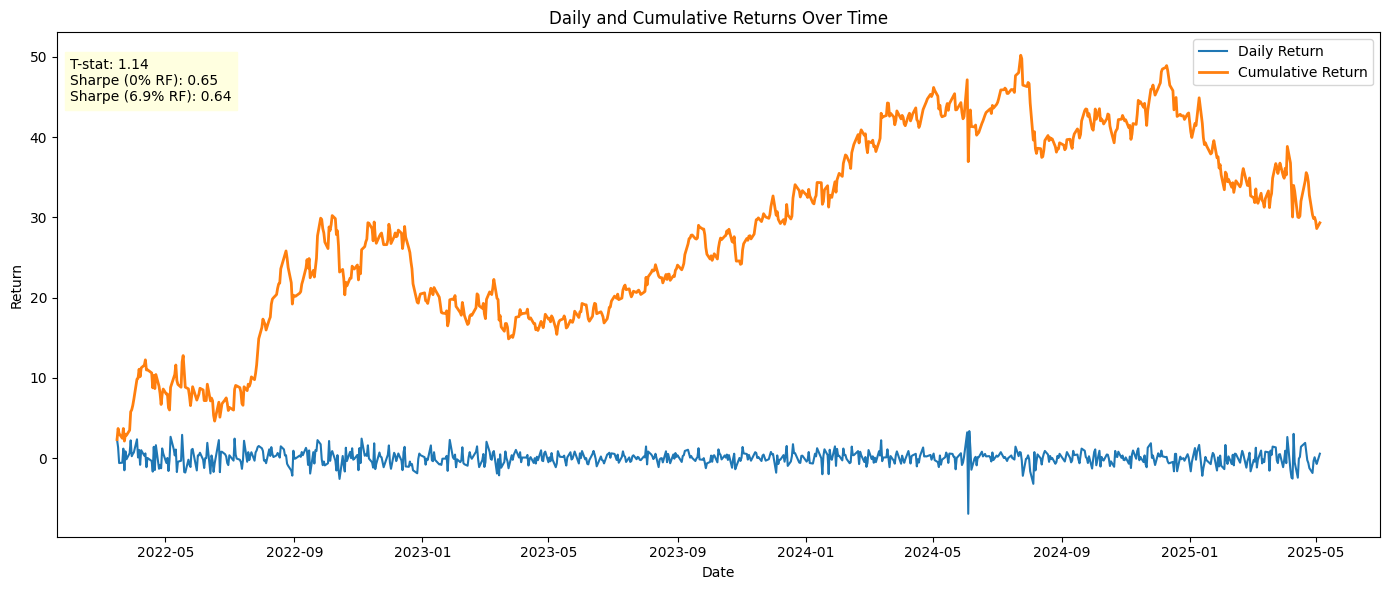

In [ ]:
ret_df_final =ret_df[['Return','Cumulative Return']].reset_index()
ret_df_final['Return'] = ret_df_final['Return']*100
mean_ret = ret_df_final['Return'].mean()
std_ret = ret_df_final['Return'].std(ddof=1)
t_stat = mean_ret / (std_ret / np.sqrt(len(ret_df_final)))

# Annualized Sharpe ratios
trading_days = 252
sharpe_0_rf = (mean_ret / std_ret) * np.sqrt(trading_days)


# Plotting
plt.figure(figsize=(14, 6))
plt.plot(ret_df_final['Date'], ret_df_final['Return'], label='Daily Return')
plt.plot(ret_df_final['Date'], ret_df_final['Cumulative Return'], label='Cumulative Return', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Return')
plt.title('Daily and Cumulative Returns Over Time')
plt.legend()

# Annotation
metrics_text = (
    f"T-stat: {t_stat:.2f}\n"
    f"Sharpe (0% RF): {sharpe_0_rf:.2f}\n"
    
)
plt.annotate(metrics_text, xy=(0.01, 0.95), xycoords='axes fraction',
             fontsize=10, backgroundcolor='lightyellow', verticalalignment='top')

plt.tight_layout()
plt.show()
 


In [1]:
print("nayani")

nayani


In [2]:
a=2
b=9
a+b

11